# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [23, 250, 300]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,3191,1993,1799,1730,234,710
2,16448,6243,6360,824,2662,2005


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.29
* Milk: 5796.26
* Grocery: 7951.27 	 
* Frozen: 3071.93 
* Detergents_paper: 2881.49
* Delicatessen: 1524.87

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

_Sample 0_: Fresh produce market
> All the purchases of this customer are much higher than the corresponding mean values. These purchases fall into the upper 25% for most categories, except 'Frozen'. Given that 'Fresh', 'Milk', 'Groceries' and 'Delicatessen' are about 10 times the mean values, I guess that this customer might be a fresh produce market and deli. I would also assume that the business is rather large in our collection of customers.

_Sample 1_: Breakfast/lunch eatery
> These purchases are well below the corresponding mean values. 'Fresh' and 'Grocery' are about 25% of the mean values, while 'Frozen' and 'Delicatessen' are about half of the mean values. The customer purchases mostly 'Fresh' and spends equal amounts on 'Milk', 'Grocery' and 'Frozen'.  The amont spent on 'Detergents_Paper' is much smaller. This establishment could be a breakfast and lunch eatery. I would also classify this business as small in comparison with the other customers in our dataset.

_Sample 2_: Natural foods deli
> The purchases of 'Fresh', 'Milk', 'Delicatessen' and 'Detergents_Paper' are just above the average values. The amount spent on 'Frozen' items is only about a quarter of the mean value. The amount spend on 'Detergents_Paper' is close to average, which could suggest that the business has a dine-in option. This could be a fresh and natural foods deli. I would assume that the size of this business is average among the group of customers in the dataset.

In conclusion, I would guess that the first sample corresponds to a rather large business that sells a variety of goods with both options of dine-in or carry-out. The second sample corresponds to a smaller establishment that prefers fresh foods and which offers some food service. The third sample corresponds to an establishment of average size in our group, which prefers fresh ingredients and which offers food service in a restaurant setting.   

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data =  data.drop(['Frozen'], axis = 1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Frozen'], 
                                                    test_size=0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set

#from sklearn.model_selection import cross_val_score
score = regressor.score(X_test, y_test)                                                               

In [5]:
print("The prediction score is {}.".format(score))

The prediction score is 0.253973446697.


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

* I choose the 'Frozen' feature to explore. 
* The prediction score for 'Frozen' is  0.2539.
* The low positive value of the prediction score indicates that 'Frozen' is a relevant feature which should be considered when investigating customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

In [6]:
### import packages for optimal vizualizations
import matplotlib.pyplot as plt
import seaborn as sns

### change the style of the figure for improved clarity
sns.set(style="whitegrid")

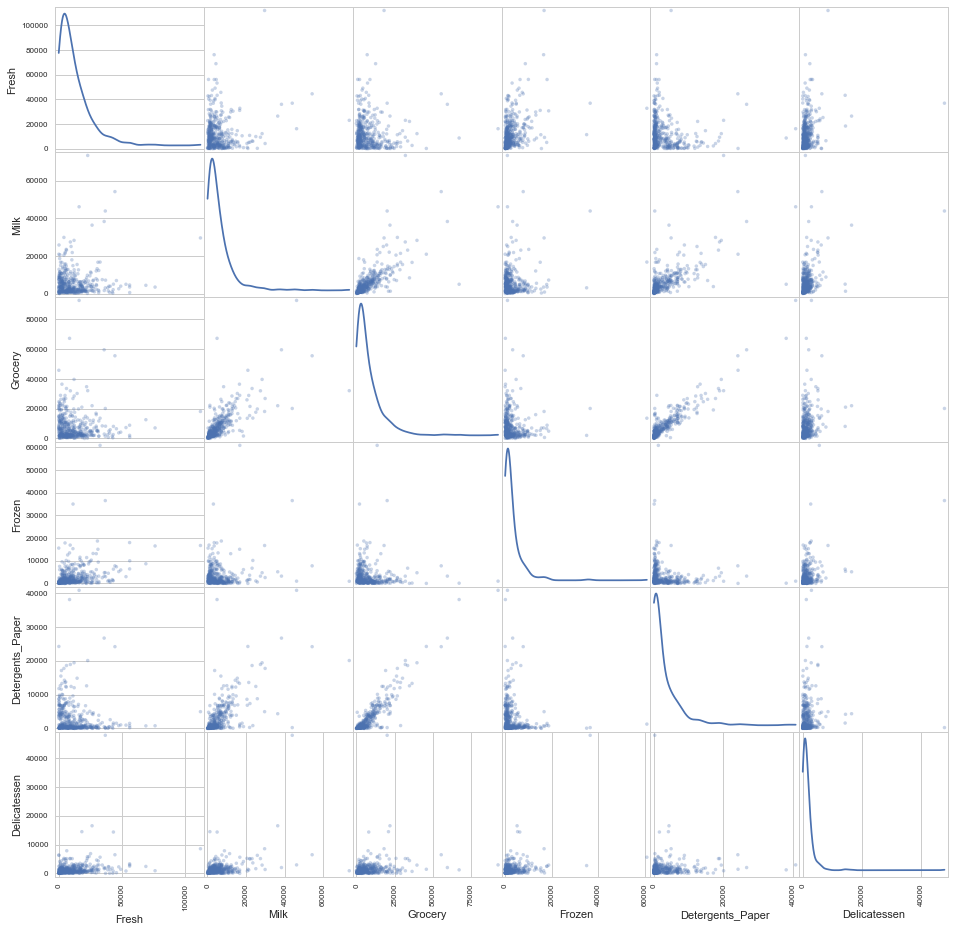

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (16,16), diagonal = 'kde');

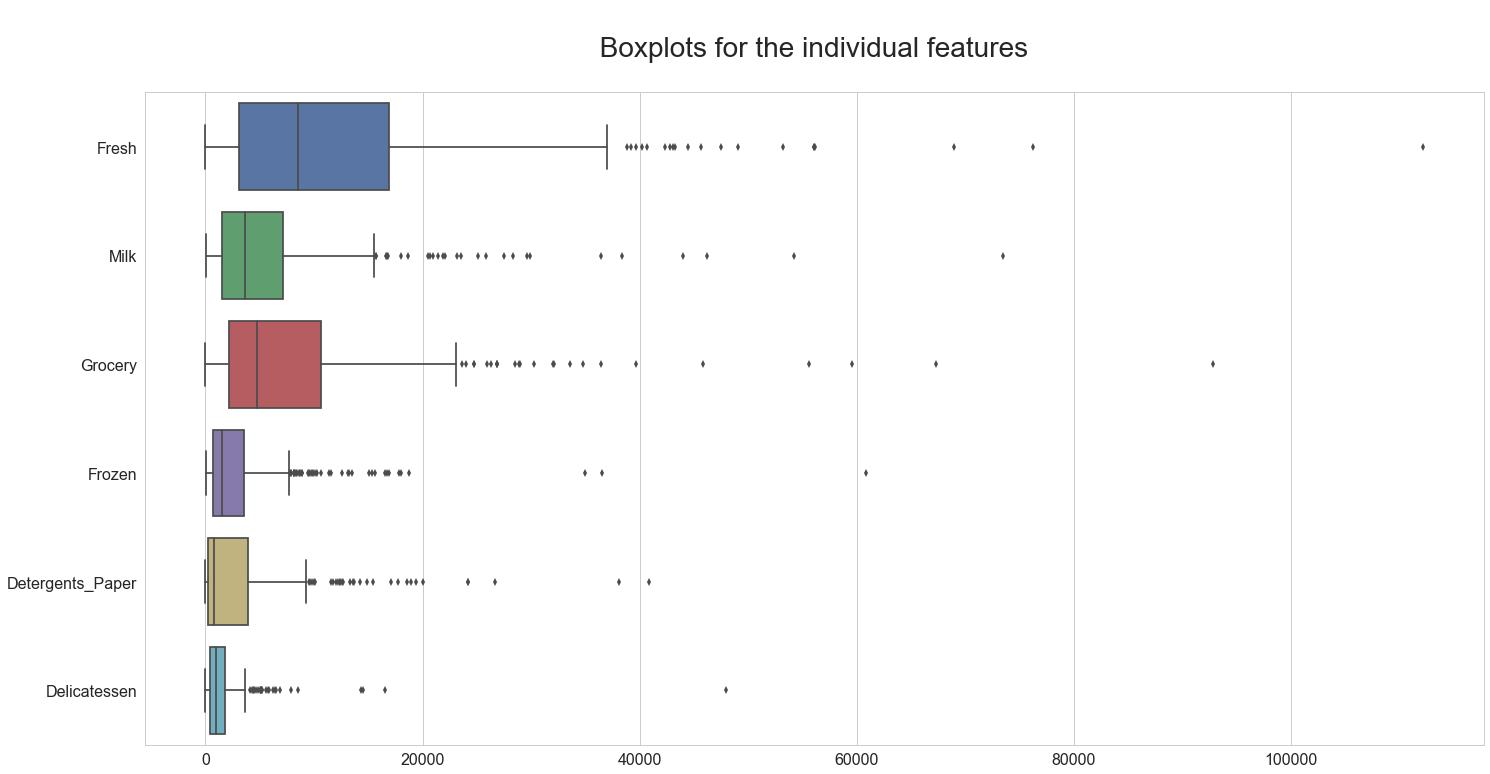

In [8]:
### create the figure in which the chart will be drawn
plt.figure(figsize=(24,12), linewidth=2, frameon=True)

### the boxplots for the numerical columns in the dataset
ax = sns.boxplot(data=data, orient="h")

### title and ticks  
plt.title('\n Boxplots for the individual features \n', fontsize=28)
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

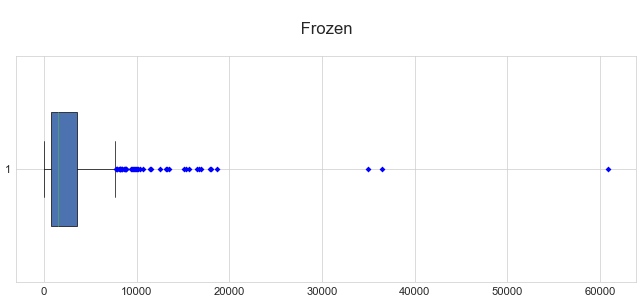

In [9]:
### boxplot for the 'Frozen' feature 

### create the figure in which the chart will be drawn
plt.figure(figsize=(16,6), dpi=50, linewidth=2, frameon=True)

### the horizontal boxplot
plt.boxplot(data['Frozen'], sym='bD', vert=False, widths=.5, 
            patch_artist=True, showfliers=True)

### title and ticks  
plt.title('\n Frozen \n', fontsize=24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

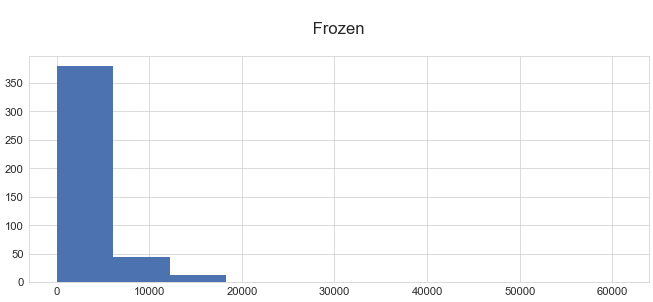

In [10]:
### histogram for the 'Frozen' feature

### create the figure in which the chart will be drawn
plt.figure(figsize=(16,6), dpi=50, linewidth=2, frameon=True)

### the histogram
plt.hist(data['Frozen'])

### title and ticks  
plt.title('\n Frozen \n', fontsize=24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

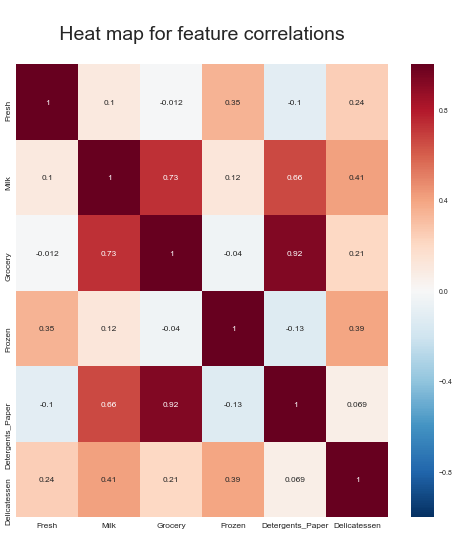

In [11]:
### create the figure in which the chart will be drawn
plt.figure(figsize=(12,12), dpi=50)

### heat map that contains the correlation coefficients for each pair of features
ax = sns.heatmap(data.corr(), annot=True)

### title and ticks  
plt.title('\n Heat map for feature correlations \n', fontsize=28)
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

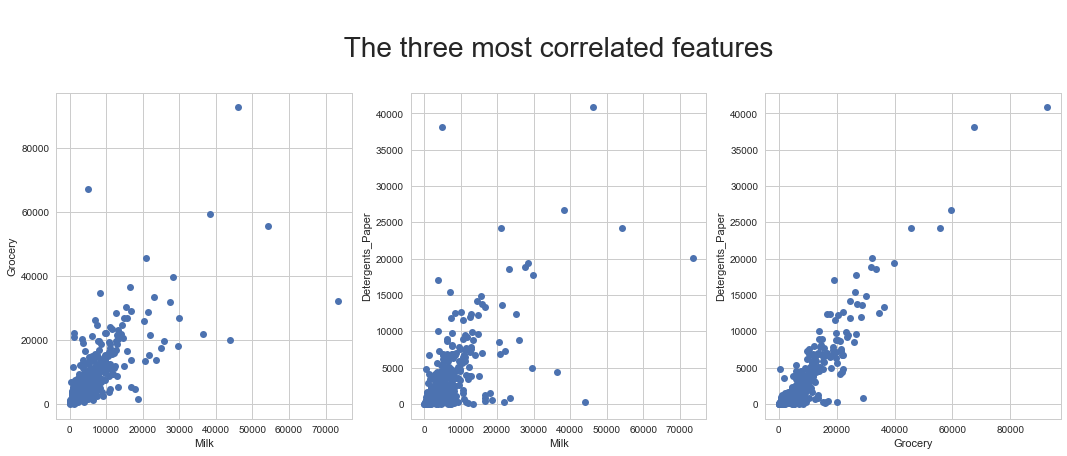

In [12]:
### create the figure in which the chart will be drawn
plt.figure(figsize=(18,6))

### select the most correlated features
my_list=['Grocery', 'Milk', 'Detergents_Paper']

### the scatterplots with labels

plt.subplot(1,3,1)
plt.plot(data['Milk'],data['Grocery'], 'o')
plt.xlabel('Milk')
plt.ylabel('Grocery')

plt.subplot(1,3,2)
plt.plot(data['Milk'],data['Detergents_Paper'], 'o')
plt.xlabel('Milk')
plt.ylabel('Detergents_Paper')

plt.subplot(1,3,3)
plt.plot(data['Grocery'],data['Detergents_Paper'], 'o')
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')

plt.subplot(1,3,2)
plt.title('\n The three most correlated features \n', fontsize=28);

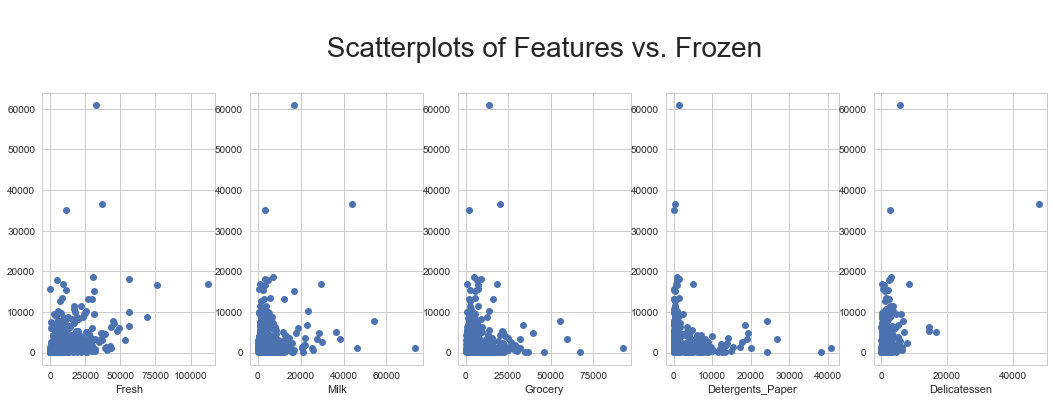

In [13]:
### create the figure in which the chart will be drawn
plt.figure(figsize=(18,5))

### the list of five features, except 'Frozen'
five_features = ['Fresh', 'Milk', 'Grocery', 'Detergents_Paper', 'Delicatessen']

### scatterplots for each feature vs. 'Frozen'
for i, col in enumerate(five_features):
    plt.subplot(1,5,i+1)
    plt.plot(data[col],data['Frozen'], 'o')
    plt.xlabel(col)

### the title
plt.subplot(1,5,3)
plt.title('\n Scatterplots of Features vs. Frozen \n', fontsize=28);

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to separate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

From the plots on the diagonal in the scatter matrix, and also using the individual features boxplots, I notice the following:
* The features' distributions are all right skewed and each contains numerous outliers. 
* The 'Fresh' items are the most popular, followed by 'Grocery'. 'Delicatessen' and 'Frozen' are the least bought items.

Regarding now the pairs of features and using the values of the correlation indices:
* For the pairs ('Fresh', 'Groceries'), ('Fresh', 'Detergent_Paper'), ('Frozen', 'Groceries') and ('Frozen', 'Detergent_Paper') the model does not fit the trend of the data, the correlation coefficients are negative.  
* The most correlated features (the highest coefficents) are ('Groceries', 'Detergents_Paper'), ('Groceries', 'Milk') and ('Milk', 'Detergents_Paper'). These correlations can be easily observed  from the corresponding scatterplots.

Regarding the chosen feature 'Frozen':
* For the 'Frozen' items, there is a high peak at around $\$$5000 per year. Outliers are also present. Overall the 'Frozen' data values correspond to the general trend of the shapes of the distributions for the other features.
* From the correlation matrix and the corresponding heatmap, I see that 'Frozen' is not correlated with 'Milk', 'Grocery' and 'Detergents_Paper'. The correlation coefficients are rather small for the remaining features 'Fresh' and 'Deliatessen'. These results confirm my observation that  'Frozen' is indeed a relevant feature, that has to be taken into account in the analysis of the dataset.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

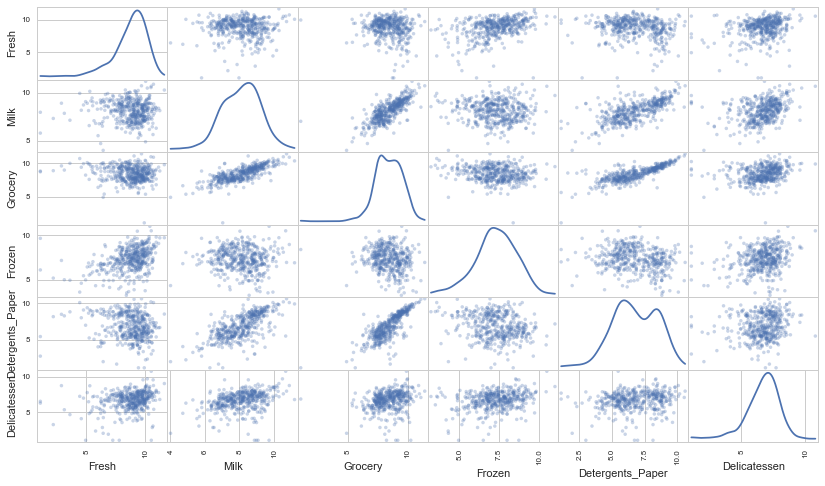

In [14]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

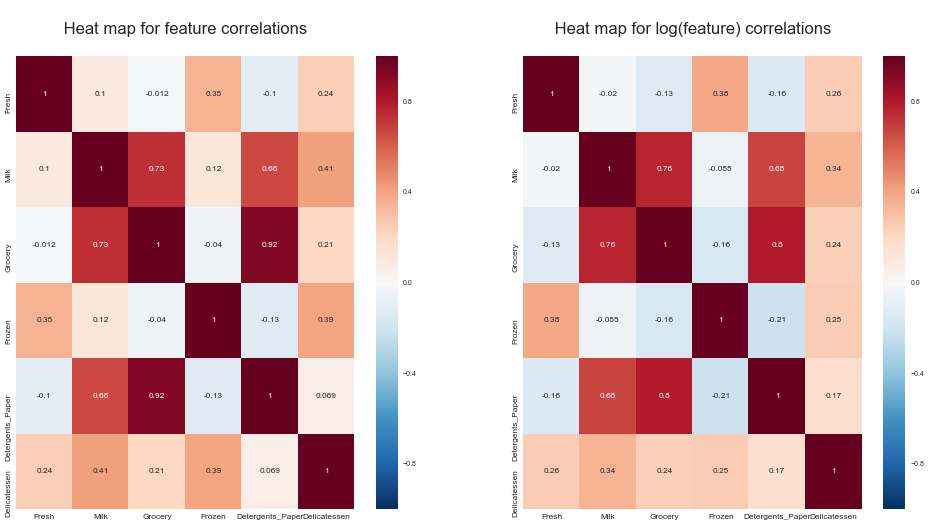

In [15]:
### create the figure in which the chart will be drawn
plt.figure(figsize=(24,12), dpi=50)

### heat map that contains the correlation coefficients for each pair of features
plt.subplot(1,2,1)
ax = sns.heatmap(data.corr(), annot=True)

### title and ticks  
plt.title('\n Heat map for feature correlations \n', fontsize=24)
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

### heat map that contains the correlation coefficients for each pair of features
plt.subplot(1,2,2)
ax = sns.heatmap(log_data.corr(), annot=True)

### title and ticks  
plt.title('\n Heat map for log(feature) correlations \n', fontsize=24)
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

In [16]:
print('Features Correlations')
display(data.corr())
print('Log(Features) Correlations')
display(log_data.corr())

Features Correlations


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Log(Features) Correlations


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


**Comments:**
* The correlation coefficients for the pairs 'Milk', 'Grocery' and 'Milk', Detergents_Paper' are not very much changed after applying the logarithm transformation. 
* The correlation coefficient between 'Grocery' and 'Detergents_Paper' decreases from 0.92 to 0.79 after applying the logarithm transformation.

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [17]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
1,8.068090,7.597396,7.494986,7.455877,5.455321,6.565265
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [18]:
# necessary packages to count and identify the duplicates in the outliers lists
from collections import Counter
import itertools

outliers_all=[]

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5* (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= (Q1 - step)) & (log_data[feature] <= (Q3 + step)))])
    
    
    # list outliers by feature
    by_feature = log_data[~((log_data[feature] >= (Q1 - step)) & (log_data[feature] <= (Q3 + step)))]
    
    # identify the index of each outlier and store these in a list of lists
    outliers_index_by_feature = by_feature.index.tolist()
    outliers_all.append(outliers_index_by_feature)
    
# flatten the results into a simple list
outliers_list = list(itertools.chain(*outliers_all))

# remove all multiple occurences from the list of all outliers  
outliers = list(set(outliers_list))

# count the occurences of each index in the list of all outliers
counter = Counter(outliers_list)

# select those indices that appear more than once 
outliers_dups  = [key for key in counter.keys() if counter[key]> 1]


# OPTIONAL: Select the indices for data points you wish to remove

# Remove all the outliers
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

In [19]:
# the total number of outliers, combined from each feature
print('The total number of outliers in the dataset is {}.\n'.format(len(outliers_list)))

#number of occurences for each duplicate
print('The outliers for more than one feature are {}.'.format(counter.most_common(5)))

The total number of outliers in the dataset is 48.

The outliers for more than one feature are [(154, 3), (128, 2), (65, 2), (66, 2), (75, 2)].


**Answer:**

There are 48 outliers. Among these five datapoints are outliers for more than one feature and they count for 11 out of the total 48 outliers, which represents 23$\%$ of the outliers. These data points have a higher chance of being misrecorded and they should be definitely removed. Thus we are left with a total of 42 outliers which is 9.5$\%$ of the data. 

Since I will perform cluster analysis on the data set, I choose to remove the remaining outliers, too. The cluster analysis is highly sensitive to outliers and removing the outliers from the data improves the cluster analysis accuracy.

_Note_: none of the sample data points are among the outliers.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

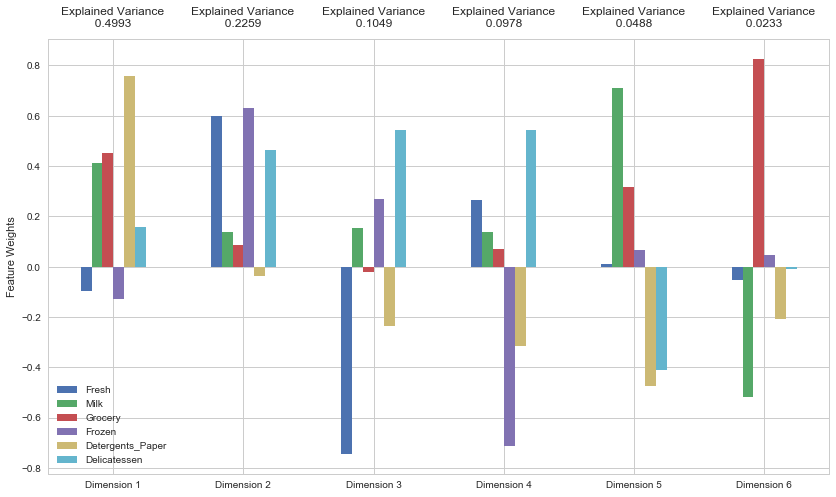

In [20]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(random_state=0)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca);

In [21]:
# display the results in numerical form
print('\n The variances and the weights of the principal components: \n')
display(pca_results)

# compute the cumulative explained variances
print('\n The cumulative explained variances are:\n')
display(pca_results.cumsum())


 The variances and the weights of the principal components: 



,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.6300,-0.0376,0.4634
Dimension 3,0.1049,-0.7452,0.1544,-0.0204,0.2670,-0.2349,0.5422
Dimension 4,0.0978,0.2667,0.1375,0.0710,-0.7133,-0.3157,0.5445
Dimension 5,0.0488,0.0114,0.7083,0.3168,0.0671,-0.4729,-0.4120
Dimension 6,0.0233,-0.0543,-0.5177,0.8267,0.0471,-0.2080,-0.0094



 The cumulative explained variances are:



,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.7252,0.5032,0.5479,0.5363,0.5020,0.7219,0.6213
Dimension 3,0.8301,-0.2420,0.7023,0.5159,0.7690,0.4870,1.1635
Dimension 4,0.9279,0.0247,0.8398,0.5869,0.0557,0.1713,1.7080
Dimension 5,0.9767,0.0361,1.5481,0.9037,0.1228,-0.3016,1.2960
Dimension 6,1.0000,-0.0182,1.0304,1.7304,0.1699,-0.5096,1.2866


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

* The first and the second principal components account for 72.52$\%$ of the variance in the data.


* Since 92.79$\%$ of variance is explained by the first four principal components, these four dimensions provide a pretty accurate summary of the data. 


* To interpret the results we recall the following facts. The results are contained in a 6 x 6 matrix P augumented to the left by a column that contains the explained variance of each principal component, that is the eigenvalues of this matrix P. The _Dimension_ vectors are the unit eigenvectors of P, their weights with respect to the original features are the corresponding row entries.


* The first principal component (Dimension 1):

    * Explains for 49.93$\%$ of the total variance in the data.
    * The features represented best by this component are 'Detergents_Paper', 'Grocery' and 'Milk'. This observation is in conformity with my previous findings regarding the highest correlation coefficients among pairs of features.
    * The weights for 'Fresh' and 'Frozen' indicate that these features are negatively correlated. This means that a customer that falls into this category will buy large quantities of  'Detergents_Paper', 'Grocery' and 'Milk' and small quantities of 'Fresh' and 'Frozen'.


* The second principal component (Dimension 2):

    * Explains for 22.59$\%$ of the total variance in the data.
    * The features represented best by this component are 'Fresh', 'Frozen' and 'Delicatessen'. These features have correlation coefficients that vary between 0.3 and 0.4.
    * This Dimension describes customers that buy large quantities of  'Fresh', 'Frozen' and 'Delicatessen', they also buy some quantities of 'Grocery' and 'Milk', the small quantities of 'Detergents_Paper' are negatively correlated to all the other purchases.


* The third principal component (Dimension 3):

    * Explains for 10.49$\%$ of the total variance in the data.
    * The features represented best by this component are 'Fresh' and 'Delicatessen'. However notice that 'Fresh' has a strong negative weight, at 0.74 while 'Fresh' has a weight of 0.54. 
    * An increase in the length of this vector corresponds to a large increase in 'Delicatessen' or to a large decrease in 'Fresh' purchases. 


* The fourth principal component (Dimension 4):

    * Explains for 9.78$\%$ of the total variance in the data.
    * The features represented best by this component are 'Frozen' and 'Delicatessen'.
    * The weights for 'Frozen' and 'Delicatessen' indicate that these features are negatively correlated. 
    * An increase in the length of this vector corresponds to large increase of purchases of 'Delicatessen' products or to a large decrease in purchases of 'Frozen'.
    
More observations:
> The structures of Dimension 1 and 2 are similar, having three rather large positive weights. The other weights have small magnitudes. Similarily, Dimension 3 and 4 both show a single large positive weight and a single dominant negative weight of larger magnitude.   

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [22]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.0921,3.2039,0.9108,1.0586,0.3270,-0.2987
1,-1.5999,-0.7127,0.7749,-0.0953,0.0554,-0.1648
2,1.3844,0.4588,-0.5028,0.9154,-0.3444,-0.3515


**Comments:**:

The sample data points weights after the PCA transformation are rather consistent with my initial observations. 
* For Sample 0, the largest purchases were in the categories 'Fresh', 'Milk' and 'Groceries', and  it is reflected by larger weights for Dimensions 1 and 2. These weights are much greater than the other weights in the sample data table, which conforms with my guess that this is a larger business.
* For Sample 1 (that purchases mostly 'Fresh' and 'Grocery') the highest weight is for Dimension 3, which is best represented by 'Fresh' and 'Delicatessen'.
* Regarding Sample 2, the main directions are Dimensions 1 and 4. Given that this business purchases 'Fresh', 'Milk', 'Delicatessen' and 'Detergents_Paper', the transformation is not very close to my initial assumptions in this case. 

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [23]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [24]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.0921,3.2039
1,-1.5999,-0.7127
2,1.3844,0.4588


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

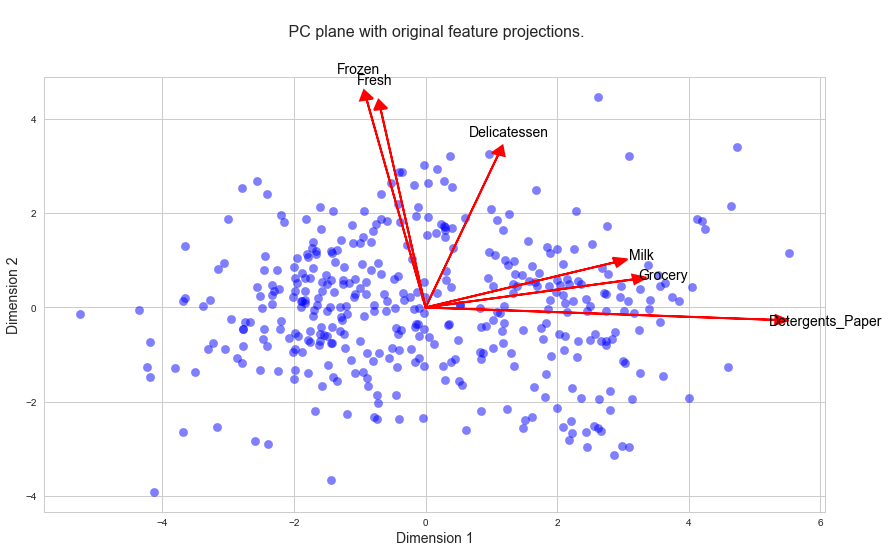

In [25]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Comments:**

The visual information provided by the biplot is consistent with the numerical results and with the bar charts for the features' weights of the principal components: 

* The biplot indicates that the features 'Detergents_Paper', 'Grocery' and 'Milk' (in this order) have the highest degrees of correlation with the first principal component 'Dimension 1'. This can be easily observed in the corresponding bar chart also.
* From the bar chart for 'Dimension 2' we see that the purchases of 'Frozen', 'Fresh' and 'Delicatessen' are much larger for this section of customers, these are also the features that look closer to 'Dimension 2' in the biplot. 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

<span style="text-decoration:underline">K-Means Clustering Algorithm:</span>

We choose a number of clusters to start with and we randomly assign their center points. By computing the distances to each of these cluster centers, each data point is classified to be in the group whose center is closest to. Next, the  cluster centers are replaced with the centroids of each cluster. The procedure is repeated several times until the stability of the centers is attained.

The K-Means is an example of _hard clustering_, which means that we are certain at every iterative step to each cluster each data point belongs.

The advantages are that the K-Means algorithm:
* is computationally simple and fast,
* is easy to implement and to understand.

The disadvantages of the K-Means algorithm:
* we have to select the number of clusters;
* the algorithm is not consistent, it may yield different clustering on different runs of the algorithm (since it starts with a random choice of the centers); 
* it handles only clusters that are circularly shaped;
* the hard clustering assignment might lead to mislabelling of the data points.

<span style="text-decoration:underline">Gaussian Mixture Model Clustering Algorithm:</span>

We assume that the data points have Gaussian distributions along its dimensions, hence each cluster can be described by the mean and the variance. We begin by selecting the number of clusters and randomly initializing the Gaussian distribution parameters for each cluster. We then compute the probability for which each data point belongs to a particular cluster. The closer a point is to the Gaussian distribution's center, the more likely it belongs to that cluster. This is called _soft clustering_ and it is the _Expectation_ step. Using these probabilities as weights, we compute a new weighted average and a new weighted variance for each Gaussian distribution. This is the _Maximization_ step, as it is designed to maximize the probability of a data point to belong to a cluster. We repeat these steps until distributions stabilize from iteration to iteration. This iterative process is the EM algorithm intended for maximizing the log-likelihood function.  

The advantages of the Gaussian mixture algorithm:
* the clusters can take any elliptical shape, rather than being restricted to circles;
* since probabilities are used, we can have multiple clusters per data point.

Disadvantages:
* initialization of the clusters is difficult when the dimensionality of the data is high;
* it might lead to a local extremum of the log-likelihood function;
* it has slow convergence rate;
* difficult to interpret.

<span style="text-decoration:underline">Algorithm Selection:</span>

Given the nature of our dataset, where the businesses can be labelled and classified in more than one way, I think that soft clustering is more appropriate. Therefore I choose the Gaussian Mixture Model Clustering (GMM) to work with.  


Sources:
* C.M. Bishop, Pattern Recognition and Machine Learning, Springer (2006), Chapter 9.
* [G. Seif, The 5 Clustering Algorithms Data Scientists Need to Know.](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)
* [Quora: What is the difference between K-means and the mixture model of Gaussian?](https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian)

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [26]:
### import necessary packages

from sklearn import mixture
from sklearn.metrics import silhouette_score

In [27]:
### compute the silhouette scores for various numbers of clusters

results = []
for m in range(2, len(reduced_data)):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = mixture.GaussianMixture(n_components=m, random_state=0).fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # TODO: Find the cluster centers
    centers = clusterer.means_
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    ### save the number of clusters and the silhouette scores in a list
    results.append([m, score])

In [28]:
### save the list of results as a pandas dataframe and rrename its columns
silhouette_results = pd.DataFrame(results)
silhouette_results.columns=['clusters', 'coefficient']

In [29]:
### print the largest 10 silhouette scores
ordered_results = silhouette_results.sort_values(by=['coefficient'], ascending=False)

print('\n The 10 largest silhouette scores and the corresponding number of clusters:\n')
display(ordered_results.head(10))


 The 10 largest silhouette scores and the corresponding number of clusters:



,clusters,coefficient
0,2,0.446754
88,90,0.374616
86,88,0.373880
87,89,0.373167
89,91,0.369852
84,86,0.369786
85,87,0.369756
92,94,0.368993
90,92,0.368039
91,93,0.367748


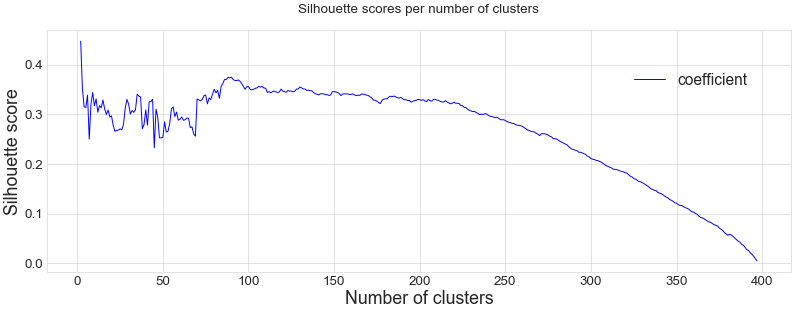

In [30]:
### line plot for the silhouette scores vs. number of clusters

### create the figure in which the plot will be drawn
plt.figure(figsize=(24, 8), dpi=40, linewidth=3, frameon=True)

### the line plots
plt.plot(silhouette_results['clusters'], silhouette_results['coefficient'], color='b')


### the title, labels and the ticks
plt.title('Silhouette scores per number of clusters\n', fontsize=24)

plt.xlabel('Number of clusters', fontsize=32)
plt.ylabel('Silhouette score', fontsize=32)

plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)

### add grid to the graph
plt.rc('grid', linestyle="-", color='k')
plt.grid(True)

### the legend 
plt.legend(bbox_to_anchor=(0.95, 0.85), loc=1, borderaxespad=0., fontsize=28)

plt.grid(True)
plt.show()


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
 
The dataset is not very large and we can easily compute the silhouette scores for many choices of cluster numbers. I think it is interesting to see how these scores vary if we start with the smallest number of clusters and find all the scores up to where each point in the dataset is a cluster. The line graph of these values indicate that the silhouete score has a clear maximum at n=2 and the second largest value is attained when n=90 clusters.
 
Some of the silhouette scores for small number of clusters are given below:

In [31]:
display(silhouette_results.head(5))

,clusters,coefficient
0,2,0.446754
1,3,0.352561
2,4,0.315138
3,5,0.313569
4,6,0.338435


It is clear from both the investigation of the dataframe and from the line plot of possible scores that the best number of clusters is 2, with a score of 0.4467.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [32]:
### the clustering algorithm for n=2 clusters

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = mixture.GaussianMixture(n_components=2, random_state=0).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.means_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)


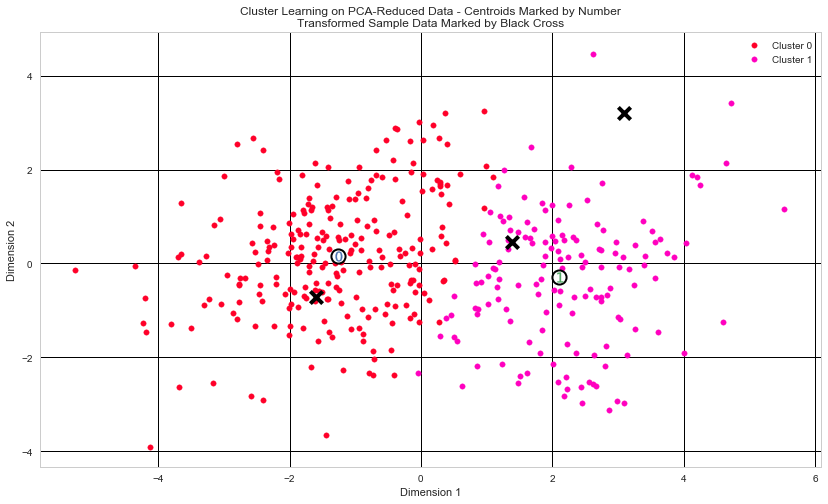

In [33]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [34]:
# TODO: Inverse transform the centers
log_centers =pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9494.0,2049.0,2598.0,2203.0,337.0,796.0
Segment 1,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

A customer in Segment 0 purchases mostly 'Fresh'. Comparing with the mean values for the entire data, 'Milk', 'Grocery' and 'Delicatessen' are about half of the overage values, while 'Fresh' and 'Frozen' are higher than the average values. The amount spend on 'Detergents_Paper' is about one eigth of the average value. This type of business could correspond to a cafeteria that sells food prepared mostly from fresh ingredients. 

The group of customers described by Segment 1, purchase larger quantities than the average of 'Milk', 'Grocery' and 'Detergents_Paper'. The 'Fresh' produce are about half of the average while 'Frozen' is about one third of the average. The 'Delicatessen' are just below the average. Given the large amount spent on 'Detergents_Paper', I would guess that this establishment might be a food market or a grocery store.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [35]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

('Sample point', 0, 'predicted to be in Cluster', 1)
('Sample point', 1, 'predicted to be in Cluster', 0)
('Sample point', 2, 'predicted to be in Cluster', 1)


**Answer:**

According to the answer in Question 1, Sample 0 corresponds to a fresh produce market. The purchases are dominated by 'Fresh', 'Milk' 'Groceries' and 'Delicatessen'. The 'Frozen' purchases are below average. I would agree with the model's prediction that this Sample could fall in the Cluster 1 category.

For Sample 1, the purchases in the categories 'Frozen' and 'Delicatessen' are relative larger to their mean values than the purchaes in 'Fresh' and 'Grocery'. The amount spent on 'Detergents_Paper' is quite small. I characterized this customer as breakfast/lunch eatery. This customer falls in Cluster 0.

Sample 2 customer spend twice as much on 'Fresh' than on 'Milk' and 'Grocery', a fraction of all these on 'Frozen', while the amounts spent on 'Detergents_Paper' and 'Delicatessen' are similar, and about one third of the 'Milk'-'Grocery' ones. I assumed this would be a natural foods deli. Given the prevalence of the 'Milk' and 'Grocery' purchases I agree with the model's prediction that this sample fits in the Segment 1 better than Segment 0.  

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

In my opinion, among the six different types of products available, the category 'Fresh' will be affected the most by the change in the delivery service. Thus the customers that purchase mostly 'Fresh' will probably prefer a 5 day delivery service.

We consider the shopping patterns that correspond to the two cluster centers. We notice that in Segment 1, the customers purchase large quantities of 'Milk' and also good amounts of 'Fresh' products, which together add to slightly more than half of the total amount spent (with 22$\%$ fresh and 32$\%$ milk of the total expenses). On the other hand, Segment 0 customers spend more than 60$\%$ on 'Fresh' and 'Milk', with more than half of the total purchases on 'Fresh'. Taking into account these observations, I think that the customers in Segment 0 will be more affected by a delivery service change. 

I would run two independent A/B tests, one on each customer segment, at the same time. Specifically, I will randomly choose subsets of customers from each segment, these subsets will be equally divided each into testing and control groups. The customers in the testing group will have the delivery changed to 3 days per week, while the customers in the control group will maintain the 5 days delivery. Each of these customers will be asked to fill in a short satisfaction survey, or just to answer a short binary question. The outcome of the survey will be combined with information on the purchase history of the customer to create a metric for the test. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We could use a simple supervised classifier, such as the nearest neighbor, for example. As indicated, the _customer segment_ is added to the analyzed data as an extra feature. The available data (or a randomly chosen sample of it) provides the training set $X$, while the corresponding vector of 'customer segment' data will provide the labels or the targets for training. Hence target variable is the 'customer segment'. The new set of customers will form the testing data and its vector of cluster belonging the target variable we try to predict. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

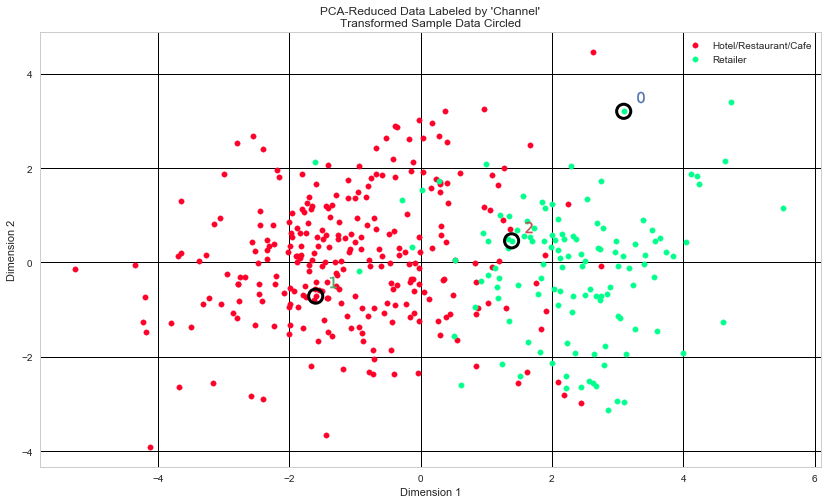

In [36]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* The clustering algorithm with 2 clusters I implemented gives similar results to the clustering based on the 'Chanel' data. In the latter however, we can see that there is a lot of color overlap, in the middle section of the graph.
* Using the scatterplot and the grid, I would guess that those rectangles which contain points of a single color would approximately correspond to groups of customers that can be clearly labeled in one way or another. The customers that can be classified as pure 'Hotel/Restaurant/Cafe' are mostly situated to the left, where Dimension 1 is less than -2. The customers that can be considered pure 'Retailer' are situated on the right of the plot, mostly where Dimension 1 is greater than 4. 
* The two classifications obtained using 'Channel' feature are in accordance with my descriptions of customer segments to a certain point. I classified Segment 1 as a food market, which indeed can be considered a retailer. For Segment 0, I classified the cluster center as a cafeteria which also conforms to the new classification. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.